# Tokenisation

The term *tokenisation* refers to the process of breaking down a text or sentence into smaller units called *tokens*. In `lambeq` these tokens correspond to words, since the parser needs to know exactly what kind of words or symbols and punctuation marks are included in the sentence in order to provide an accurate grammatical analysis.

## Word tokenisation

By default, Bobcat parser assumes that every word in a sentence is delimited by a whitespace, as below:

```
"John gave Mary a flower"
```
   
Note however that when working with raw text, this is rarely the case. Consider for example the sentence:

```
"This sentence isn't worth £100 (or is it?)."
```
   
A naïve tokenisation based on white spaces would result in the following list of tokens:

```
["This", "sentence", "isn't", "worth", "£100", "(or", "is", "it?)."]
```
   
missing, for example, that "isn't" represents actually two words and "(or" is not a proper word. 

In `lambeq`, tokenisation is provided through the `Tokeniser` class hierarcy, and specifically by using the `SpacyTokeniser` class, based on the popular NLP package [SpaCy](<https://spacy.io>). Here is an example:

In [1]:
from lambeq import SpacyTokeniser

tokeniser = SpacyTokeniser()
sentence = "This sentence isn't worth £100 (or is it?)."
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['This',
 'sentence',
 'is',
 "n't",
 'worth',
 '£',
 '100',
 '(',
 'or',
 'is',
 'it',
 '?',
 ')',
 '.']

We can then pass the list of the tokens to the parser, setting the `tokenised` argument of the `BobcatParser.sentence2diagram` method to True.

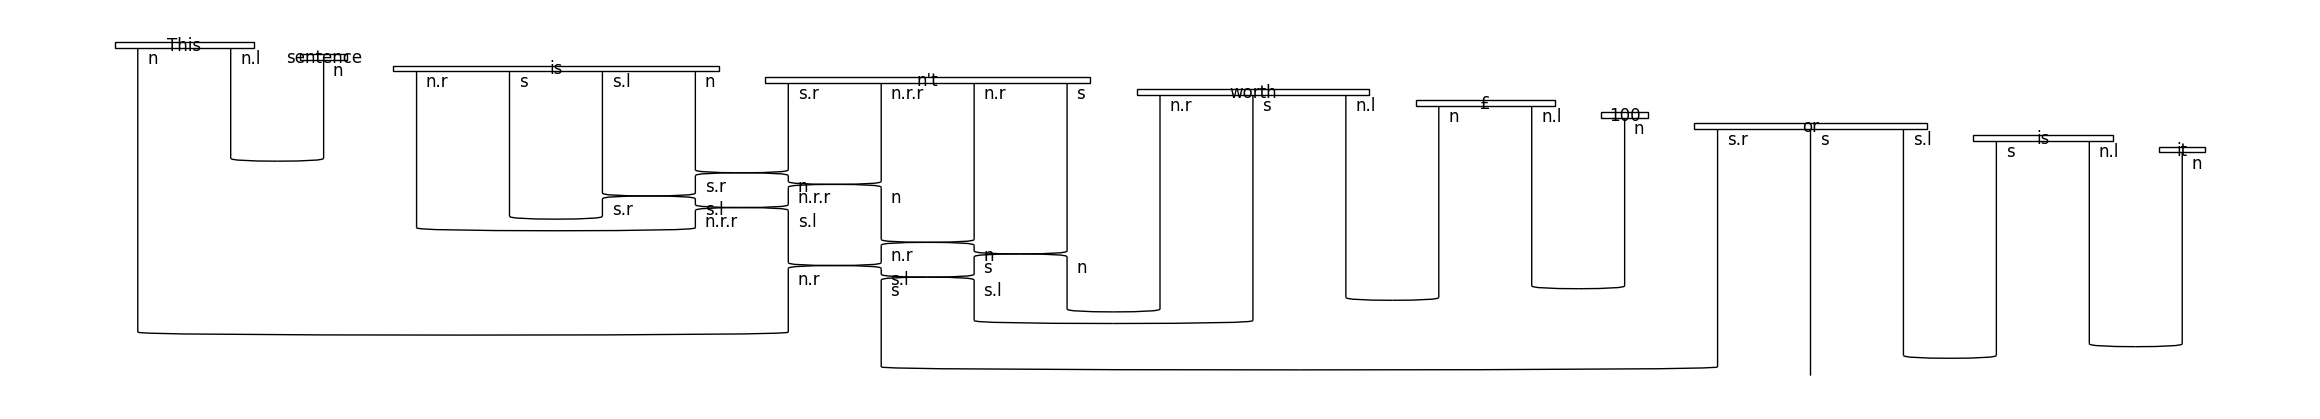

In [2]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(tokens, tokenised=True)

diagram.draw(figsize=(23,4), fontsize=12)

To tokenise many sentences at once, use the `SpacyTokeniser.tokenise_sentences` method:

In [3]:
sentences = ["This is a sentence.", "This is (another) sentence!"]

tok_sentences = tokeniser.tokenise_sentences(sentences)
tok_sentences

[['This', 'is', 'a', 'sentence', '.'],
 ['This', 'is', '(', 'another', ')', 'sentence', '!']]

## Splitting a document into sentences

Finally, `lambeq` provides tokenisation at the sentence-level:

In [4]:
text = "I love pizza. It is my favorite food. I could eat it every day!"
sentences = tokeniser.split_sentences(text)
sentences

['I love pizza.', 'It is my favorite food.', 'I could eat it every day!']